In [4]:
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
import scipy

#Import some image analysis functions
from scipy.ndimage import gaussian_filter1d as gf1d
from scipy.ndimage import gaussian_filter as gf
from scipy.ndimage import uniform_filter as uf

import sys

##################################################################################################
# CHANGE THIS TO THE PATH WHERE THE DDM CODE IS (GET FROM GITHUB IF YOU HAVEN'T YET)             #
path_to_ddm_code = "C:\\Users\\rmcgorty\\Documents\\GitHub\\Differential-Dynamic-Microscopy---Python\\"
##################################################################################################

sys.path.append(path_to_ddm_code)
import radiav
import tiff_file
import ddm_clean as ddm

import pickle

In [5]:
%matplotlib notebook

Imports not working? Make sure to grab the [DDM repository from GitHub](https://github.com/rmcgorty/Differential-Dynamic-Microscopy---Python). 

Don't know what all those scipy.ndimage functions are? [Check out the documentation](https://docs.scipy.org/doc/scipy/reference/ndimage.html). 

In [8]:
all_data_dict = {}

for movie_num in [1,2,3,4,5,6,7,8,9,10,11]:

    #Set directory where to find the data:
    main_data_dir = "Y:\\Dennis Terwilliger\\Data\\2020-10-30\\Flow Sweep\\Flow Sweep_(0.1-1000Hz)_(1000-0.1Hz)20x\\"
    data_dir = "Flow Sweep_(0.1-1000Hz)_(1000-0.1Hz)20x_%i\\" % movie_num

    data_file = "Flow Sweep_(0.1-1000Hz)_(1000-0.1Hz)20x_%i_MMStack_Default.ome.tif" % movie_num
    
    data_dump_file = open(main_data_dir+data_dir+data_file[:-23]+"_pickleddata.p",'rb')
    
    all_data_dict[movie_num] = pickle.load(data_dump_file)
    data_dump_file.close()

In [17]:
all_data_dict[1].keys()

dict_keys(['data_dir', 'filtersize', 'frames_analyzed', 'num_frames_to_avg', 'every', 'corr_images', 'af', 'af_upto20'])

In [18]:
movies = np.array([1,2,3,4,5,6,7,8,9,10,11],dtype=np.int)
corr_ims = np.zeros((len(movies),492,596))
af_upto20 = np.zeros((len(movies)))

for i,movie_num in enumerate(movies):
    corr_ims[i] = all_data_dict[movie_num]['corr_images'].mean(axis=0)
    af_upto20[i] = all_data_dict[movie_num]['af_upto20'].mean()

<IPython.core.display.Javascript object>


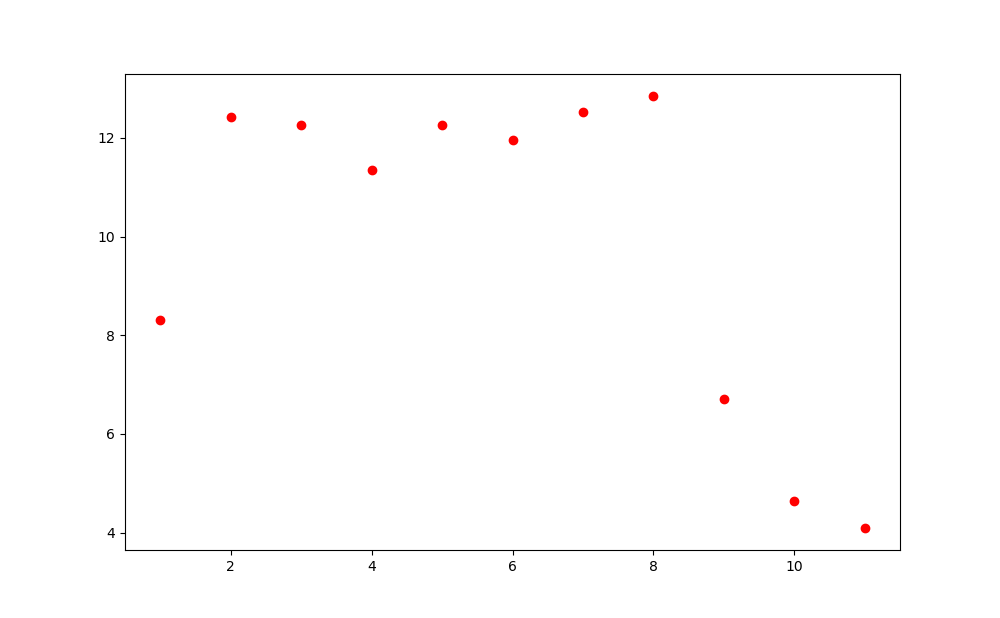

In [19]:
figsize = 10.0
fig, ax = plt.subplots(figsize=(figsize,figsize/1.618))
plt.plot(movies, af_upto20,'ro')

<IPython.core.display.Javascript object>


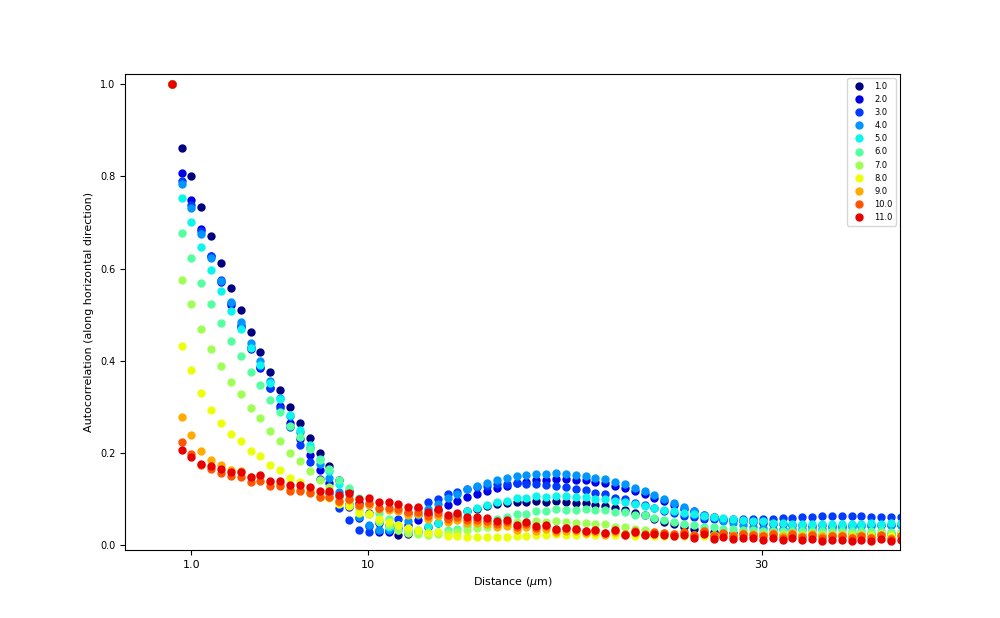

[Text(0, 0, '1.0'),
 Text(0, 0, '10'),
 Text(0, 0, '30'),
 Text(0, 0, '50'),
 Text(0, 0, '70'),
 Text(0, 0, '90')]

In [21]:
#Here, we plot a *horizontal* slice through the image autocorrelation.

cmap = matplotlib.cm.get_cmap('jet')

nx,ny = corr_ims[0].shape
x_mid = int(nx/2); y_mid = int(ny/2)


figsize = 10.0
fig, ax = plt.subplots(figsize=(figsize,figsize/1.618))
xvalues = np.arange(y_mid+1)*0.501 #For the rheometer microscope with 20x objective pixel size is 0.501um
ax.tick_params(axis='both', which='major', labelsize=7)
markerSize = 5
mark = 'o'
j=0
for i,mov in enumerate(movies):
    plt.plot(xvalues, np.flip(corr_ims[i,x_mid, 0:y_mid+1]),mark,ms=markerSize,
                 c=cmap(i/(1.0*len(movies))),label="%.1f" % mov)

plt.xlabel("Distance ($\mu$m)",fontsize=8)
plt.ylabel("Autocorrelation (along horizontal direction)",fontsize=8)
#plt.title("Image: %s. \n Filter size: %i" % (main_data_dir+data_dir+data_file[:-23], filtersize), fontsize=7)
plt.legend(loc=0,fontsize=6)


ax.set_xticks([1.0, 10, 30, 50, 70, 90])
ax.set_xticklabels(['1.0','10','30','50','70','90'], fontsize=8)
#plt.savefig(main_data_dir+data_dir+data_file[:-23]+"_xcorr.png")

<IPython.core.display.Javascript object>


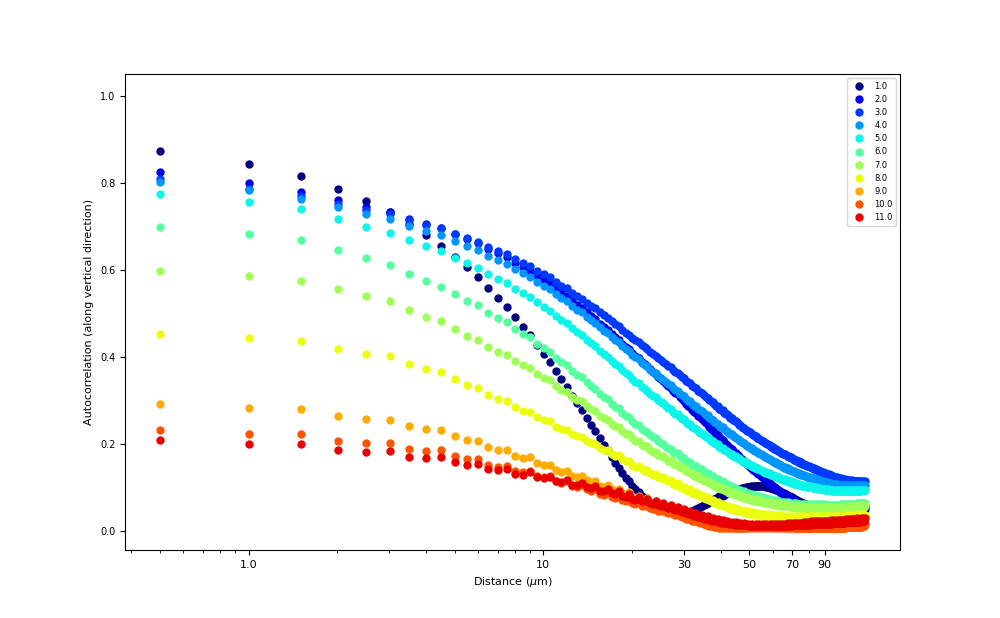

[Text(0, 0, '1.0'),
 Text(0, 0, '10'),
 Text(0, 0, '30'),
 Text(0, 0, '50'),
 Text(0, 0, '70'),
 Text(0, 0, '90')]

In [14]:
#Here, we plot a *horizontal* slice through the image autocorrelation.

cmap = matplotlib.cm.get_cmap('jet')

nx,ny = corr_ims[0].shape
x_mid = int(nx/2); y_mid = int(ny/2)


figsize = 10.0
fig, ax = plt.subplots(figsize=(figsize,figsize/1.618))
xvalues = np.arange(x_mid+1)*0.501 #For the rheometer microscope with 20x objective pixel size is 0.501um
ax.tick_params(axis='both', which='major', labelsize=7)
markerSize = 5
mark = 'o'
j=0
for i,mov in enumerate(movies):
    plt.semilogx(xvalues, np.flip(corr_ims[i,0:x_mid+1, y_mid]),mark,ms=markerSize,
                 c=cmap(i/(1.0*len(movies))),label="%.1f" % mov)

plt.xlabel("Distance ($\mu$m)",fontsize=8)
plt.ylabel("Autocorrelation (along vertical direction)",fontsize=8)
#plt.title("Image: %s. \n Filter size: %i" % (main_data_dir+data_dir+data_file[:-23], filtersize), fontsize=7)
plt.legend(loc=0,fontsize=6)


ax.set_xticks([1.0, 10, 30, 50, 70, 90])
ax.set_xticklabels(['1.0','10','30','50','70','90'], fontsize=8)
#plt.savefig(main_data_dir+data_dir+data_file[:-23]+"_xcorr.png")